# Multilinear Regression UBIG

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
dataset = pd.read_csv(r'E:\pythonjupyter\datasets\50_Startups.csv')
dataset

,R&D,Administrasi,Marketing,Wilayah,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
print(dataset.isna().sum())

R&D             0
Administrasi    0
Marketing       0
Wilayah         0
Profit          0
dtype: int64


In [5]:
print(dataset.isnull().sum())

R&D             0
Administrasi    0
Marketing       0
Wilayah         0
Profit          0
dtype: int64


In [6]:
print(dataset.dtypes)

R&D             float64
Administrasi    float64
Marketing       float64
Wilayah          object
Profit          float64
dtype: object


In [7]:
rows,columns = dataset.shape
print("Jumlah Baris:",rows)
print("Jumlah Kolom (Variabel):",columns)

Jumlah Baris: 50
Jumlah Kolom (Variabel): 5


# EDA

<Axes: >

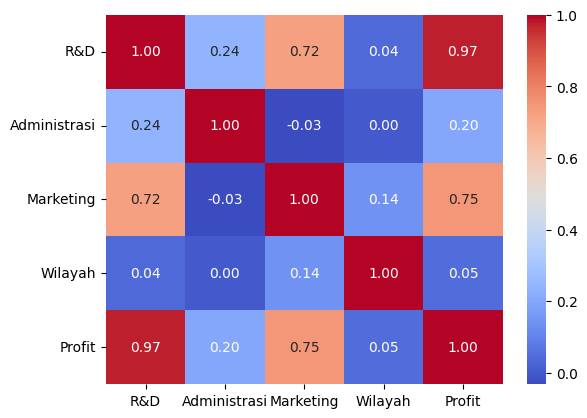

In [8]:
dataset['Wilayah'] = dataset['Wilayah'].map({'New York':0,'California':1,'Florida':2})
correlation = dataset.corr()
sns.heatmap(data=correlation,annot=True,cmap="coolwarm",fmt='.2f')

<Axes: >

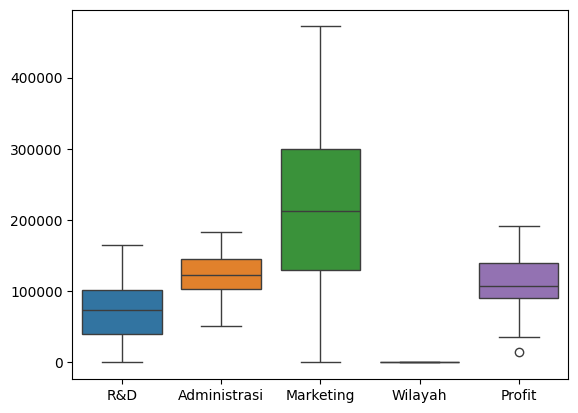

In [9]:
sns.boxplot(data=dataset)

<Axes: ylabel='count'>

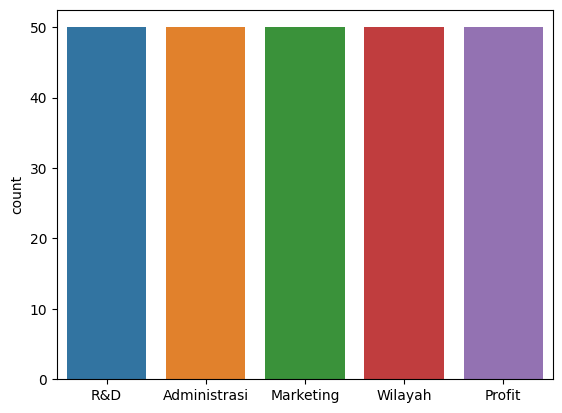

In [10]:
sns.countplot(data=dataset)

# Modelling

In [11]:
x= dataset[['R&D','Marketing']]
y= dataset['Profit']

### Acak dan bagi dataset

In [12]:
np.random.seed(42)
shuffled_index = np.random.permutation(len(dataset))

#Membagi data
train_size = int(0.8*len(dataset))
train_indices = shuffled_index[:train_size]
test_indices = shuffled_index[train_size:]

x_train,x_test = x.iloc[train_indices],x.iloc[test_indices]
y_train,y_test = y.iloc[train_indices],y.iloc[test_indices]
# Menambahkan intercept pada x_train dan x_test
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
x_train


array([[1.0000000e+00, 9.1992390e+04, 2.5266493e+05],
       [1.0000000e+00, 3.8558510e+04, 1.7499930e+05],
       [1.0000000e+00, 6.1994480e+04, 9.1131240e+04],
       [1.0000000e+00, 1.0002300e+03, 1.9039300e+03],
       [1.0000000e+00, 9.4657160e+04, 2.8257431e+05],
       [1.0000000e+00, 5.4205000e+02, 0.0000000e+00],
       [1.0000000e+00, 7.5328870e+04, 1.3405007e+05],
       [1.0000000e+00, 6.4664710e+04, 1.3796262e+05],
       [1.0000000e+00, 6.3408860e+04, 4.6085250e+04],
       [1.0000000e+00, 8.6419700e+04, 0.0000000e+00],
       [1.0000000e+00, 9.3863750e+04, 2.4983944e+05],
       [1.0000000e+00, 1.4210734e+05, 3.6616842e+05],
       [1.0000000e+00, 4.4069950e+04, 1.9702942e+05],
       [1.0000000e+00, 1.2054252e+05, 3.1161329e+05],
       [1.0000000e+00, 1.4437241e+05, 3.8319962e+05],
       [1.0000000e+00, 1.3461546e+05, 1.2771682e+05],
       [1.0000000e+00, 2.7892920e+04, 1.6447071e+05],
       [1.0000000e+00, 1.3154600e+03, 2.9711446e+05],
       [1.0000000e+00, 0.000

### Rumus Beta (Koefisien)

In [13]:
x_transpose = x_train.T
x_transpose_x = np.dot(x_transpose, x_train)
x_transpose_x_inv = np.linalg.inv(x_transpose_x)
x_transpose_y = np.dot(x_transpose, y_train)
beta = np.dot(x_transpose_x_inv, x_transpose_y)

print("Koefisien beta:")
print(beta)


Koefisien beta:
[4.90145350e+04 7.94948040e-01 2.53046305e-02]


In [14]:
y_pred = np.dot(x_test, beta)

print("Prediksi pada data pengujian:")
print(y_pred)


Prediksi pada data pengujian:
[135828.97138335 115511.74726594 129413.18068435  50157.62261118
 117189.98563149 160790.35779854  71552.95939136 150854.14323087
 104511.75792796  69784.0728438 ]


# Evaluasi

In [15]:
mse = np.mean((y_test - y_pred) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_residual / ss_total)


print("Mean Squared Error (MSE):", mse.round())
print("R-squared (R2):", r2.round())


Mean Squared Error (MSE): 191025924.0
R-squared (R2): 1.0


# Visualisasi

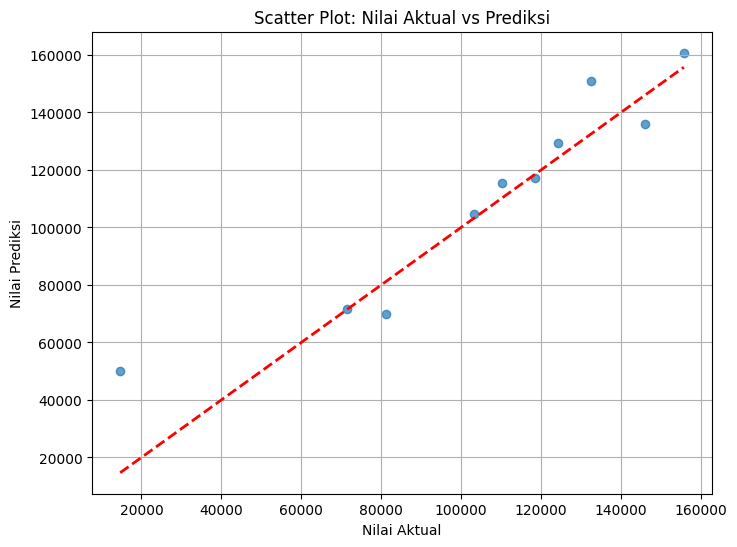

In [16]:
# Scatter plot nilai aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Garis referensi
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Scatter Plot: Nilai Aktual vs Prediksi")
plt.grid(True)
plt.show()